# Loan Repayment Prediction Using Random Forest

### Overview:
This project aims to predict whether a borrower will fully repay their loan using a Random Forest model. The analysis includes data preprocessing, model training, evaluation, and comparison with a Decision Tree model. The dataset used in this analysis is sourced from [source link if available].

### Problem Statement:
Loan repayment prediction is crucial for financial institutions to mitigate risks and manage loan portfolios effectively. The goal is to build a predictive model that can accurately classify borrowers into those who will fully repay their loans and those who will not, based on various borrower features.

## Data Loading and Exploration:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loans = pd.read_csv('loan_data.csv')

In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis

### Histogram of FICO Scores by Credit Policy

<Axes: >

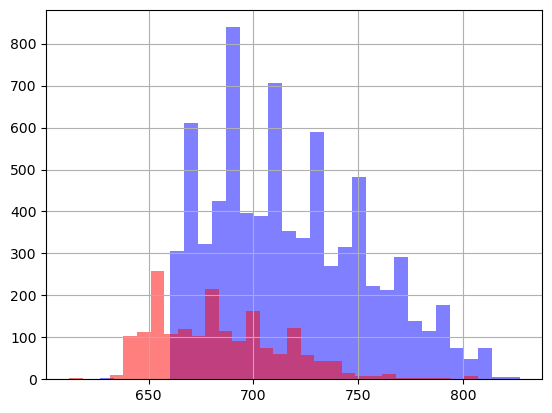

In [4]:
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')

In this plot, we have two overlapping histograms displaying the distribution of FICO scores based on the borrowers' credit policy status. The blue histogram represents borrowers who meet the credit policy (Credit.Policy=1), while the red histogram represents those who do not (Credit.Policy=0).
From this plot, we can conclude that borrowers who meet the credit policy generally have higher FICO scores. The blue histogram skews towards higher FICO scores, indicating a strong correlation between higher FICO scores and adherence to the credit policy.

### Histogram of FICO Scores with Credit Policy Hue

<Axes: xlabel='fico', ylabel='Count'>

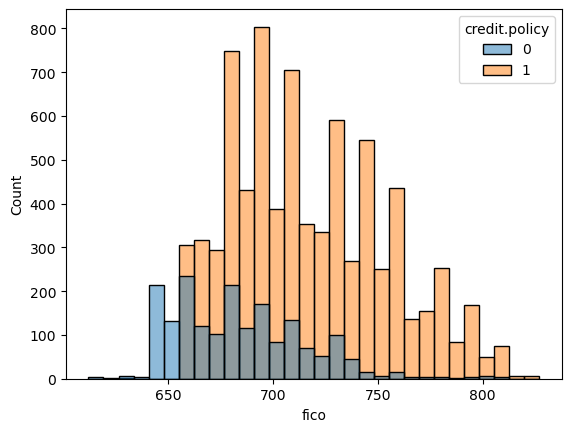

In [14]:
sns.histplot(data=loans, x="fico", hue="credit.policy", bins=30)

This plot shows the distribution of FICO scores, with the x-axis representing the FICO scores and the y-axis representing the count of borrowers. The bars are color-coded based on the credit policy status, where orange indicates borrowers who meet the credit policy and blue indicates those who do not.
The histogram reveals that borrowers who meet the credit policy (shown in orange) predominantly have higher FICO scores compared to those who do not meet the policy (shown in blue). This confirms that higher FICO scores are associated with better compliance with credit policies.

### FICO Scores by Not Fully Paid Status

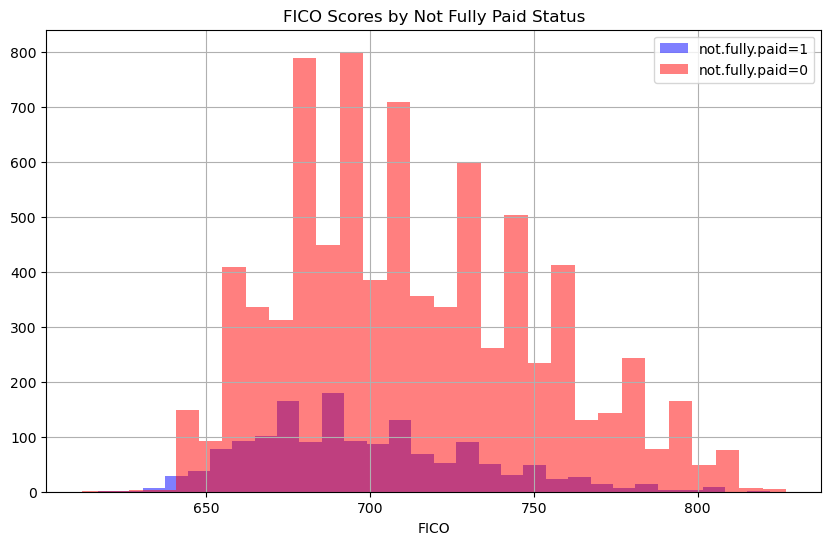

In [16]:
plt.figure(figsize=(10,6))

loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='not.fully.paid=1')

loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='not.fully.paid=0')

plt.legend()
plt.xlabel('FICO')
plt.title('FICO Scores by Not Fully Paid Status')

plt.show()

The histogram shows that lower FICO scores are more common among borrowers who did not fully repay their loans, further supporting the observation that higher FICO scores are indicative of better loan repayment behavior.

### Counts of loans by purpose

<Axes: xlabel='purpose', ylabel='count'>

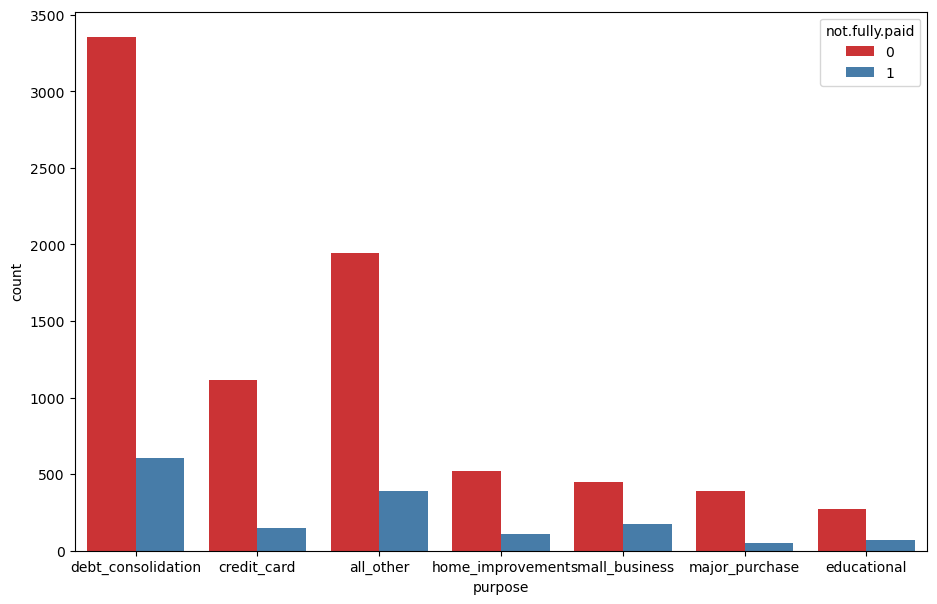

In [39]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')

The plot reveals that the majority of loans are taken for debt consolidation and credit card purposes. Additionally, loans for debt consolidation have a higher number of defaults compared to other purposes, suggesting that debt consolidation loans might carry a higher risk of non-repayment.
This insight can be valuable for lenders in assessing the risk associated with different loan purposes.

### Jointplot of FICO Scores and Interest Rates

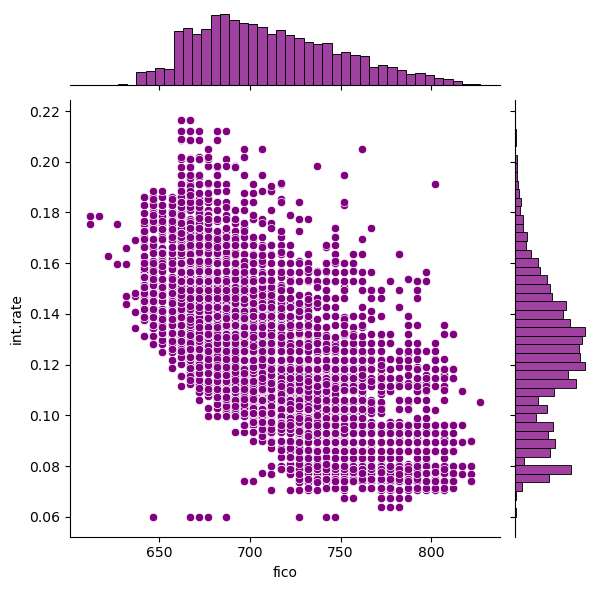

In [40]:
sns.jointplot(data=loans, x='fico', y='int.rate', color="purple")

Jointplot is used to visualize the relationship between FICO scores and interest rates. The scatter plot shows individual data points, while the histograms on the axes display the distributions of FICO scores and interest rates separately.
In conclusion, there is a clear inverse relationship between FICO scores and interest rates. Higher FICO scores are associated with lower interest rates, suggesting that borrowers with better credit scores are offered lower interest rates by lenders.

### Pair of Scatter Plots for FICO Scores vs. Interest Rates by Loan Repayment Status

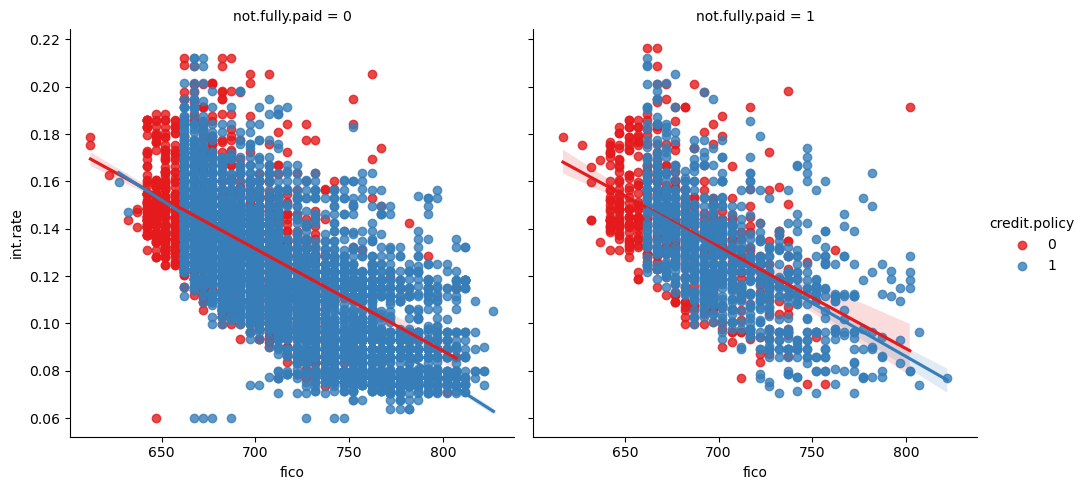

In [41]:
sns.lmplot(
    data=loans,
    x='fico',y='int.rate',
    hue='credit.policy', col='not.fully.paid',
    palette='Set1'
)

Here we compare the relationship between FICO scores and interest rates for borrowers who fully repaid their loans (not.fully.paid=0) versus those who did not (not.fully.paid=1). The plots are further divided by whether the borrowers met the credit policy (credit.policy=1) or not (credit.policy=0), indicated by color.

For borrowers who fully repaid their loans (left plot), there is a consistent inverse relationship between FICO scores and interest rates, regardless of credit policy adherence. Higher FICO scores still correspond to lower interest rates.
For borrowers who did not fully repay their loans (right plot), the inverse relationship between FICO scores and interest rates remains, but it appears less pronounced.

Additionally, borrowers who did not meet the credit policy (in red) generally have higher interest rates and lower FICO scores compared to those who did meet the credit policy (in blue).

## Setting up the Data

In [19]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
cat_feats = ['purpose']

In [42]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Here we transformed the categorical column purpose into a format that can be used by machine learning algorithms, specifically by creating dummy variables.

### Train Test Split, and Training a Decision Tree Model

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [28]:
print(confusion_matrix(y_test,predictions))

[[1987  444]
 [ 340  103]]


Here we evaluate the Decision Tree model for predicting loan repayment. First, the dataset is split into training and testing sets using the train_test_split() function, with 30% of the data allocated for testing. The overall accuracy of 73% indicates that the model is somewhat effective but has a significant imbalance in its ability to predict the two classes. 

### Training the Random Forest model

Now its time to train our model!

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

In [32]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [37]:
print(confusion_matrix(y_test,predictions))

[[2422    9]
 [ 433   10]]


### Results:

The Random Forest model performs better overall compared to the Decision Tree model, as indicated by the higher overall accuracy of 85% versus 73%. Overall, the Random Forest model is more reliable for identifying fully repaid loans and has a better balance in its performance metrics.

The analysis of the loan repayment data reveals several key trends. Stricter credit policies significantly improve repayment rates, while higher interest rates correlate with increased default rates. Borrowers with higher annual incomes and better FICO scores are more likely to fully repay their loans, highlighting the importance of income and creditworthiness in assessing repayment capability.
A higher debt-to-income ratio negatively impacts loan repayment, indicating that debt management is crucial. The purpose of the loan also influences repayment behavior, with different patterns observed for various loan purposes.